### Converting bitmaps to drawings

This notebook contains some simple code to convert bitmaps to line drawings. It uses [OpenCV](http://opencv.org/), mostly [Canny](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html) for edge detection and [findcontours](http://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=findcontours) to convert the edges into lines.

Part of getting this to work is trying various parameters and one way of doing that, is by running a whole set of them and showing the output of them in a grid. In this case we have how much we blur the image before edge detection and how much we simplify lines.

This made me think of [Warhol's famous painting of Marilyn Monroe](https://en.wikipedia.org/wiki/Marilyn_Diptych) so it seemed interesting to make this notebook into an ode to that

In [23]:
%matplotlib inline
import cv2
from skimage import io
from matplotlib import pyplot as plt
import matplotlib as pylab
pylab.rcParams['figure.figsize'] = 8, 8
import numpy as np
import requests

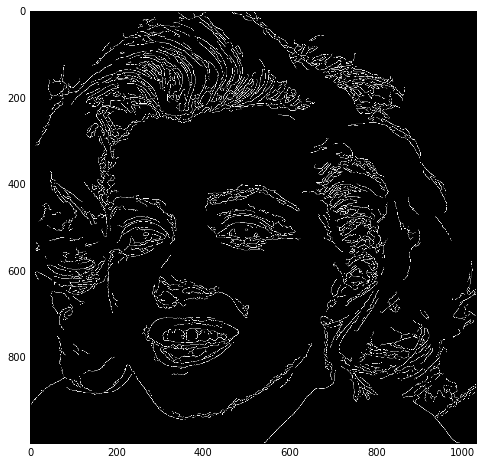

In [25]:
def find_edges(img, threshold=4, blur=10):
  blurred = cv2.bilateralFilter(img, blur, blur * 2, blur * 2)
  return cv2.Canny(blurred, threshold * 3, threshold * 20)

image = io.imread('http://oi64.tinypic.com/qs48r6.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = find_edges(gray, threshold=4, blur=10)
plt.imshow(edged, cmap="gray")
plt.show()


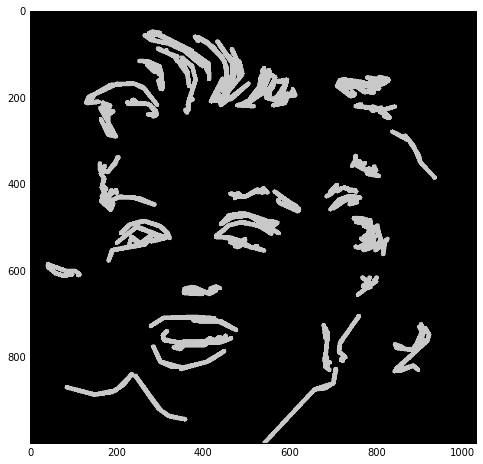

In [27]:
def simplify(cnt, epsilon=0.005):
  return cv2.approxPolyDP(cnt, epsilon * cv2.arcLength(cnt, False), False)

def find_contours(img, epsilon):
  image, contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  simplified = [simplify(cnt, epsilon) for cnt in contours]
  longest = sorted(simplified, key = lambda cnt:cv2.arcLength(cnt, False), reverse = True)
  return longest

longest = find_contours(edged, epsilon=0.01)
height, width = edged.shape
countour_im = np.zeros((height, width, 3), np.uint8)
cv2.drawContours(countour_im, longest[:50], -1, (200,200,200), 10)
plt.imshow(countour_im, cmap="gray")
plt.show()


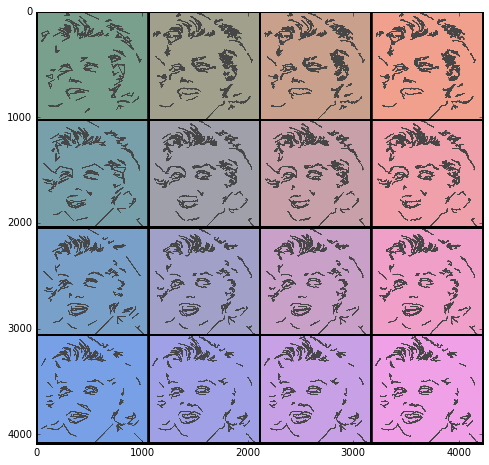

In [30]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = gray.shape

padding = 20
epsilons = [0.04 ** (1 + i * 0.5) for i in range(4)]
blurs = [3, 6, 9, 12]

main_image = np.zeros((padding + (height + padding) * len(blurs), 
                       padding + (width + padding) * len(epsilons), 3), np.uint8)

for x, epsilon in enumerate(epsilons):
  for y, blur in enumerate(blurs):
    edged = find_edges(gray, threshold=10, blur=blur)
    longest = find_contours(edged, epsilon=epsilon)
    height, width = edged.shape
    contour_im = np.zeros((height, width, 3), np.uint8)
    contour_im[:] = (120 + 40 * x, 160, 140 + 30 * y)
    cv2.drawContours(contour_im, longest[:90], -1, (70, 70, 70), 10)
    yc = padding + y * (height + padding)
    xc = padding + x * (width + padding)
    main_image[yc: yc + height, xc: xc + width] = contour_im


plt.imshow(main_image)
plt.show()

In [31]:
cv2.imwrite('tmp.jpg', image)

True